In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import torch
import numpy as np
import matplotlib.pyplot as plt

from src.models.baseline import get_model
from src.explainability.activation_maximization import (
    ActivationMaximization,
    visualize_activation_maximization,
    plot_optimization_curves
)

print(f"Project root: {project_root}")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

# Install scipy if needed
try:
    import scipy
except ImportError:
    print("Scipy not found. Install manually via 'pip install scipy'")


Project root: /home/javier/final_project_xai
Device: cuda


### Load both models

In [2]:
checkpoint_dir = project_root / 'models' / 'checkpoints'

print("🔵 Loading BASELINE model...")
baseline_model = get_model(num_classes=2, pretrained=True, device=device)
baseline_checkpoint = torch.load(checkpoint_dir / 'baseline_best.pth', weights_only=False)
baseline_model.load_state_dict(baseline_checkpoint['model_state_dict'])
baseline_model.eval()
print(f"✅ Loaded baseline model")

🔵 Loading BASELINE model...


/home/javier/miniconda3/envs/xai_project/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/javier/miniconda3/envs/xai_project/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ BaselineModel created:
   Architecture: ResNet18
   Pretrained: True
   Output classes: 2
   Dropout: 0.3
   Trainable parameters: 11,177,538
   Total parameters: 11,177,538
✅ Loaded baseline model


In [4]:
print("\n🔴 Loading SHORTCUT model...")
shortcut_model = get_model(num_classes=2, pretrained=False, device=device)
shortcut_checkpoint = torch.load(checkpoint_dir / 'shortcut_best.pth', weights_only=False)
shortcut_model.load_state_dict(shortcut_checkpoint['model_state_dict'])
shortcut_model.eval()
print(f"✅ Loaded shortcut model")


🔴 Loading SHORTCUT model...
✅ BaselineModel created:
   Architecture: ResNet18
   Pretrained: False
   Output classes: 2
   Dropout: 0.3
   Trainable parameters: 11,177,538
   Total parameters: 11,177,538
✅ Loaded shortcut model


### Generate prototypes for BASELINE Model - NORMAL class


BASELINE MODEL: NORMAL CLASS PROTOTYPES

📸 Sample 1/4

🔥 Generating image for class 0...


/home/javier/miniconda3/envs/xai_project/lib/python3.10/site-packages/torch/autograd/graph.py:768: UserWarning: grad and param do not obey the gradient layout contract. This is not an error, but may impair performance.
grad.sizes() = [1, 3, 224, 224], strides() = [150528, 50176, 224, 1]
param.sizes() = [1, 3, 224, 224], strides() = [3, 1, 672, 3] (Triggered internally at /opt/conda/conda-bld/pytorch_1720538440907/work/torch/csrc/autograd/functions/accumulate_grad.h:219.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


   Iteration 100/500: Score = 6.664
   Iteration 200/500: Score = 13.433
   Iteration 300/500: Score = 14.693
   Iteration 400/500: Score = 16.473
   Iteration 500/500: Score = 19.688
✅ Final score: 19.688

📸 Sample 2/4

🔥 Generating image for class 0...
   Iteration 100/500: Score = 10.657
   Iteration 200/500: Score = 11.361
   Iteration 300/500: Score = 16.899
   Iteration 400/500: Score = 12.982
   Iteration 500/500: Score = 12.945
✅ Final score: 12.945

📸 Sample 3/4

🔥 Generating image for class 0...
   Iteration 100/500: Score = 11.239
   Iteration 200/500: Score = 15.588
   Iteration 300/500: Score = 17.060
   Iteration 400/500: Score = 15.061
   Iteration 500/500: Score = 15.092
✅ Final score: 15.092

📸 Sample 4/4

🔥 Generating image for class 0...
   Iteration 100/500: Score = 10.161
   Iteration 200/500: Score = 13.325
   Iteration 300/500: Score = 9.852
   Iteration 400/500: Score = 12.458
   Iteration 500/500: Score = 13.864
✅ Final score: 13.864
💾 Saved: /home/javier/final

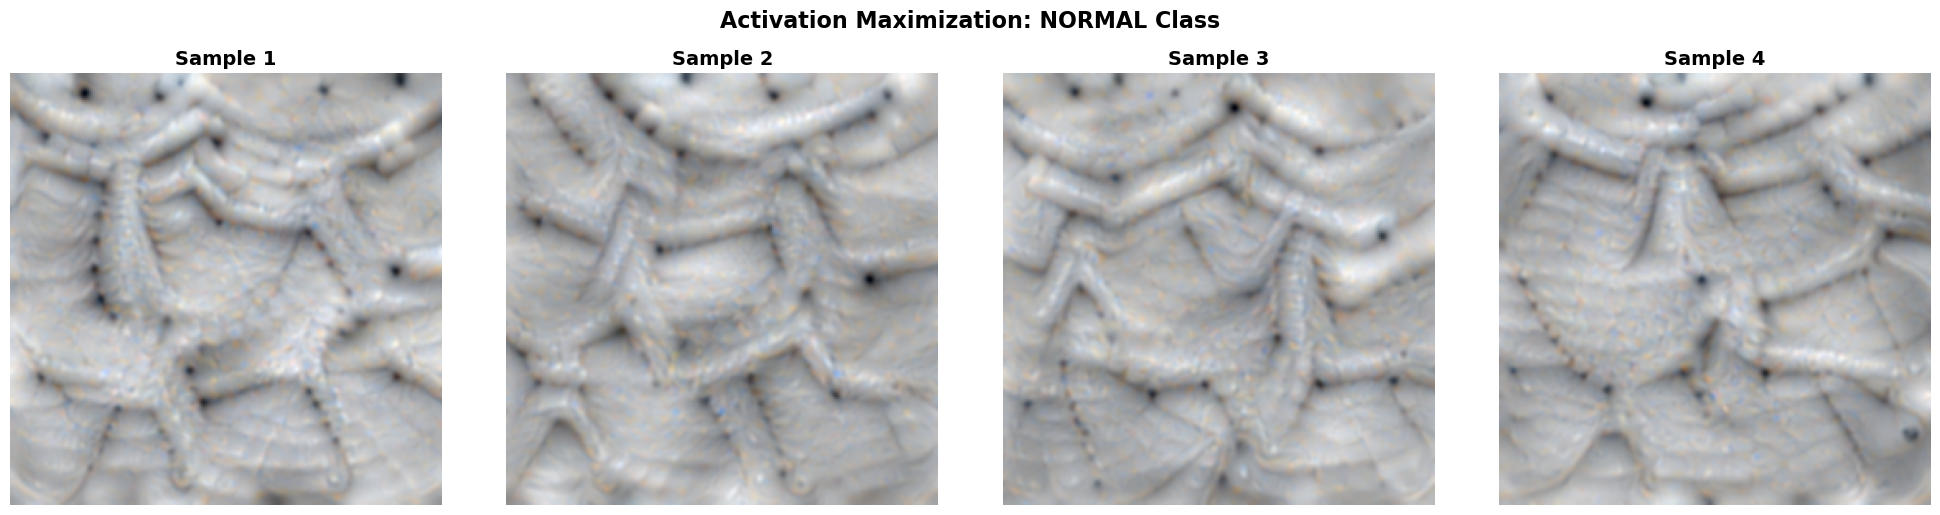

💾 Saved: /home/javier/final_project_xai/reports/figures/15_am_baseline_normal_curves.png


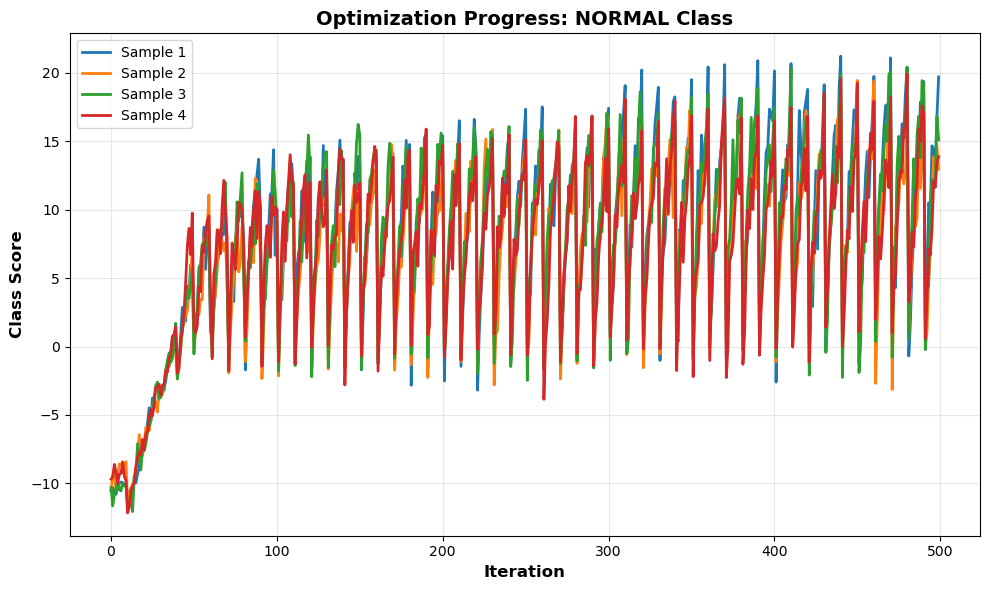

In [5]:
print("\n" + "="*70)
print("BASELINE MODEL: NORMAL CLASS PROTOTYPES")
print("="*70)

class_names = ['NORMAL', 'PNEUMONIA']

am_baseline = ActivationMaximization(baseline_model, device=device)

baseline_normal_images, baseline_normal_scores = am_baseline.generate_multiple(
    target_class=0,  # NORMAL
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

# Visualize
visualize_activation_maximization(
    baseline_normal_images,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '15_am_baseline_normal.png'
)

# Plot optimization curves
plot_optimization_curves(
    baseline_normal_scores,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '15_am_baseline_normal_curves.png'
)

### Generate prototypes for BASELINE model - PNEUMONIA class


BASELINE MODEL: PNEUMONIA CLASS PROTOTYPES

📸 Sample 1/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = 25.689
   Iteration 200/500: Score = 36.817
   Iteration 300/500: Score = 46.104
   Iteration 400/500: Score = 41.806
   Iteration 500/500: Score = 48.764
✅ Final score: 48.764

📸 Sample 2/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = 39.508
   Iteration 200/500: Score = 37.220
   Iteration 300/500: Score = 46.786
   Iteration 400/500: Score = 40.608
   Iteration 500/500: Score = 39.164
✅ Final score: 39.164

📸 Sample 3/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = 38.724
   Iteration 200/500: Score = 39.209
   Iteration 300/500: Score = 46.470
   Iteration 400/500: Score = 44.177
   Iteration 500/500: Score = 45.519
✅ Final score: 45.519

📸 Sample 4/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = 33.059
   Iteration 200/500: Score = 36.536
   Iteration 300/500: Score = 35.704
   Iteration 400/500: Score 

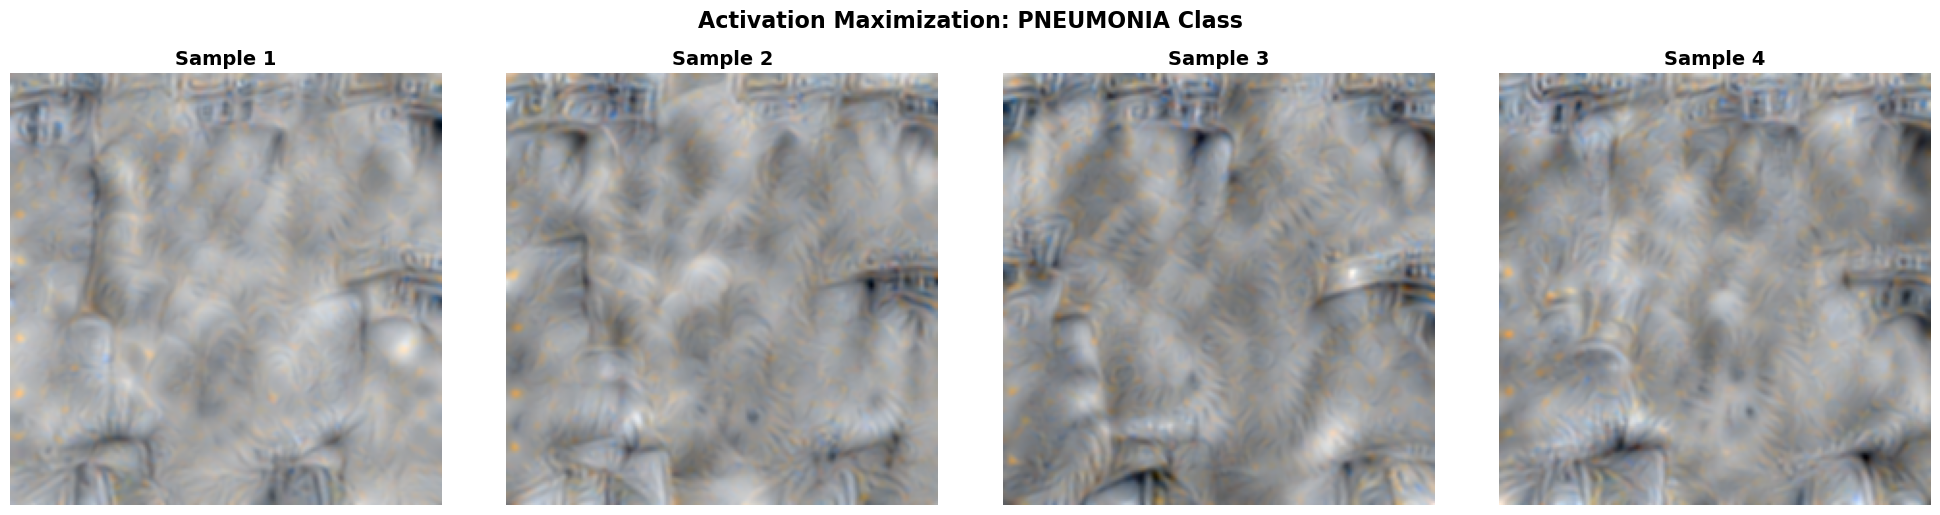

💾 Saved: /home/javier/final_project_xai/reports/figures/16_am_baseline_pneumonia_curves.png


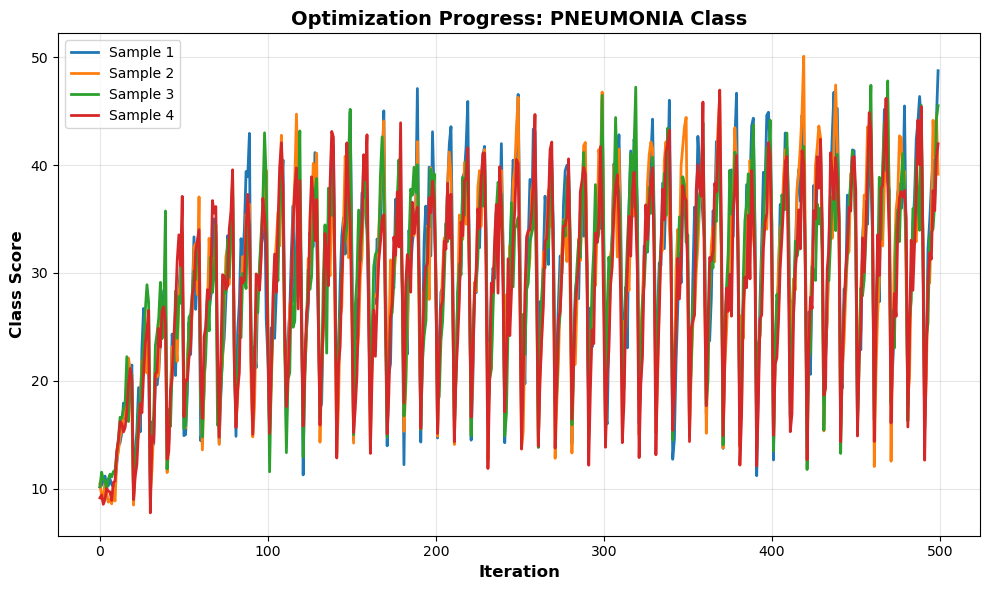

In [6]:
print("\n" + "="*70)
print("BASELINE MODEL: PNEUMONIA CLASS PROTOTYPES")
print("="*70)

baseline_pneumonia_images, baseline_pneumonia_scores = am_baseline.generate_multiple(
    target_class=1,  # PNEUMONIA
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

visualize_activation_maximization(
    baseline_pneumonia_images,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '16_am_baseline_pneumonia.png'
)

plot_optimization_curves(
    baseline_pneumonia_scores,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '16_am_baseline_pneumonia_curves.png'
)

### Generate prototypes for SHORTCUT Model - NORMAL class


SHORTCUT MODEL: NORMAL CLASS PROTOTYPES

📸 Sample 1/4

🔥 Generating image for class 0...
   Iteration 100/500: Score = 2.532
   Iteration 200/500: Score = 2.538
   Iteration 300/500: Score = 2.547
   Iteration 400/500: Score = 2.538
   Iteration 500/500: Score = 2.540
✅ Final score: 2.540

📸 Sample 2/4

🔥 Generating image for class 0...
   Iteration 100/500: Score = 2.580
   Iteration 200/500: Score = 2.541
   Iteration 300/500: Score = 2.554
   Iteration 400/500: Score = 2.552
   Iteration 500/500: Score = 2.543
✅ Final score: 2.543

📸 Sample 3/4

🔥 Generating image for class 0...
   Iteration 100/500: Score = 2.579
   Iteration 200/500: Score = 2.556
   Iteration 300/500: Score = 2.554
   Iteration 400/500: Score = 2.556
   Iteration 500/500: Score = 2.558
✅ Final score: 2.558

📸 Sample 4/4

🔥 Generating image for class 0...
   Iteration 100/500: Score = 2.559
   Iteration 200/500: Score = 2.537
   Iteration 300/500: Score = 2.547
   Iteration 400/500: Score = 2.540
   Iteration 500

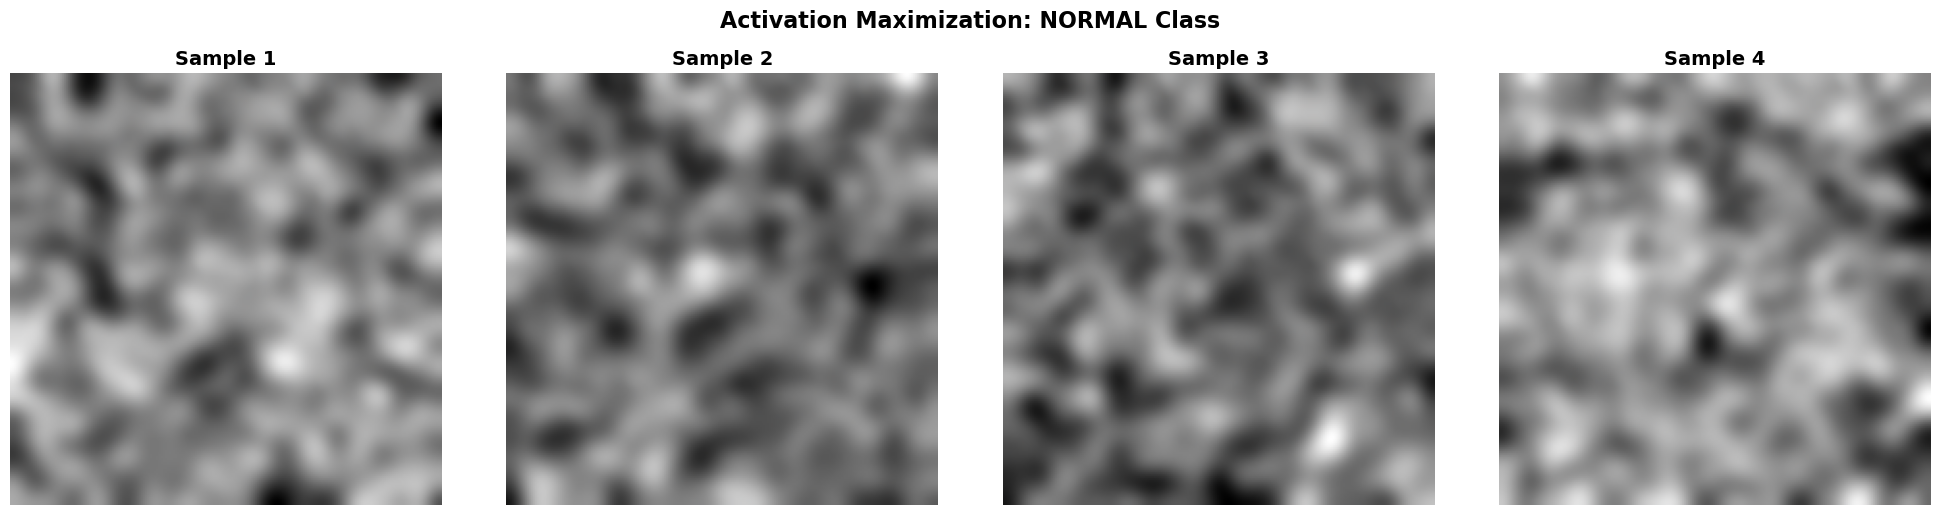

💾 Saved: /home/javier/final_project_xai/reports/figures/17_am_shortcut_normal_curves.png


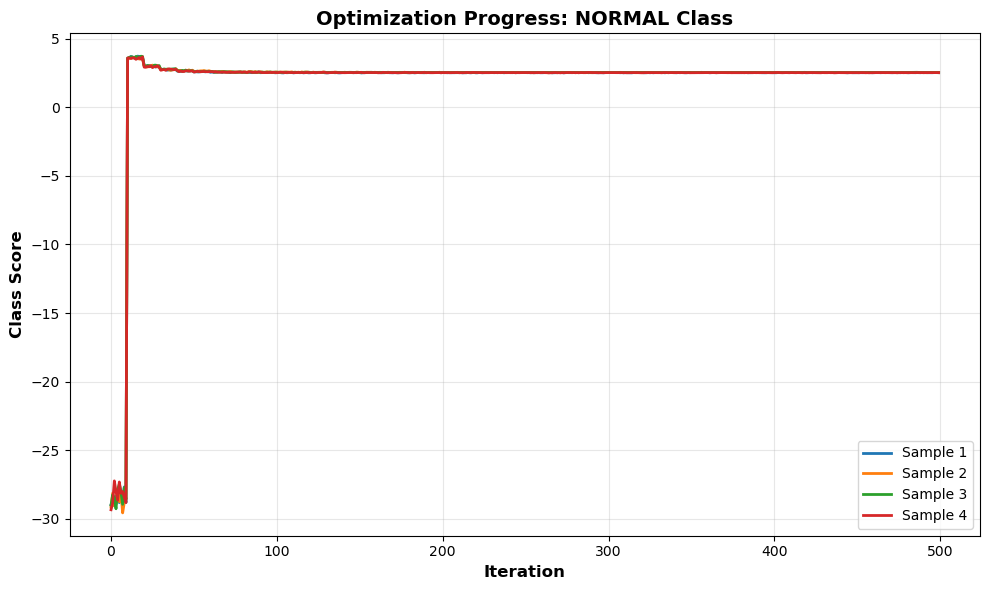

In [15]:
print("\n" + "="*70)
print("SHORTCUT MODEL: NORMAL CLASS PROTOTYPES")
print("="*70)

am_shortcut = ActivationMaximization(shortcut_model, device=device)

shortcut_normal_images, shortcut_normal_scores = am_shortcut.generate_multiple(
    target_class=0,  # NORMAL
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

visualize_activation_maximization(
    shortcut_normal_images,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '17_am_shortcut_normal.png'
)

plot_optimization_curves(
    shortcut_normal_scores,
    target_class=0,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '17_am_shortcut_normal_curves.png'
)

### Generate prototypes for SHORTCUT Model - PNEUMONIA class


SHORTCUT MODEL: PNEUMONIA CLASS PROTOTYPES

📸 Sample 1/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = -2.644
   Iteration 200/500: Score = -2.646
   Iteration 300/500: Score = -2.637
   Iteration 400/500: Score = -2.636
   Iteration 500/500: Score = -2.633
✅ Final score: -2.633

📸 Sample 2/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = -2.690
   Iteration 200/500: Score = -2.662
   Iteration 300/500: Score = -2.653
   Iteration 400/500: Score = -2.640
   Iteration 500/500: Score = -2.645
✅ Final score: -2.645

📸 Sample 3/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = -2.658
   Iteration 200/500: Score = -2.656
   Iteration 300/500: Score = -2.645
   Iteration 400/500: Score = -2.643
   Iteration 500/500: Score = -2.642
✅ Final score: -2.642

📸 Sample 4/4

🔥 Generating image for class 1...
   Iteration 100/500: Score = -2.690
   Iteration 200/500: Score = -2.655
   Iteration 300/500: Score = -2.655
   Iteration 400/500: Score 

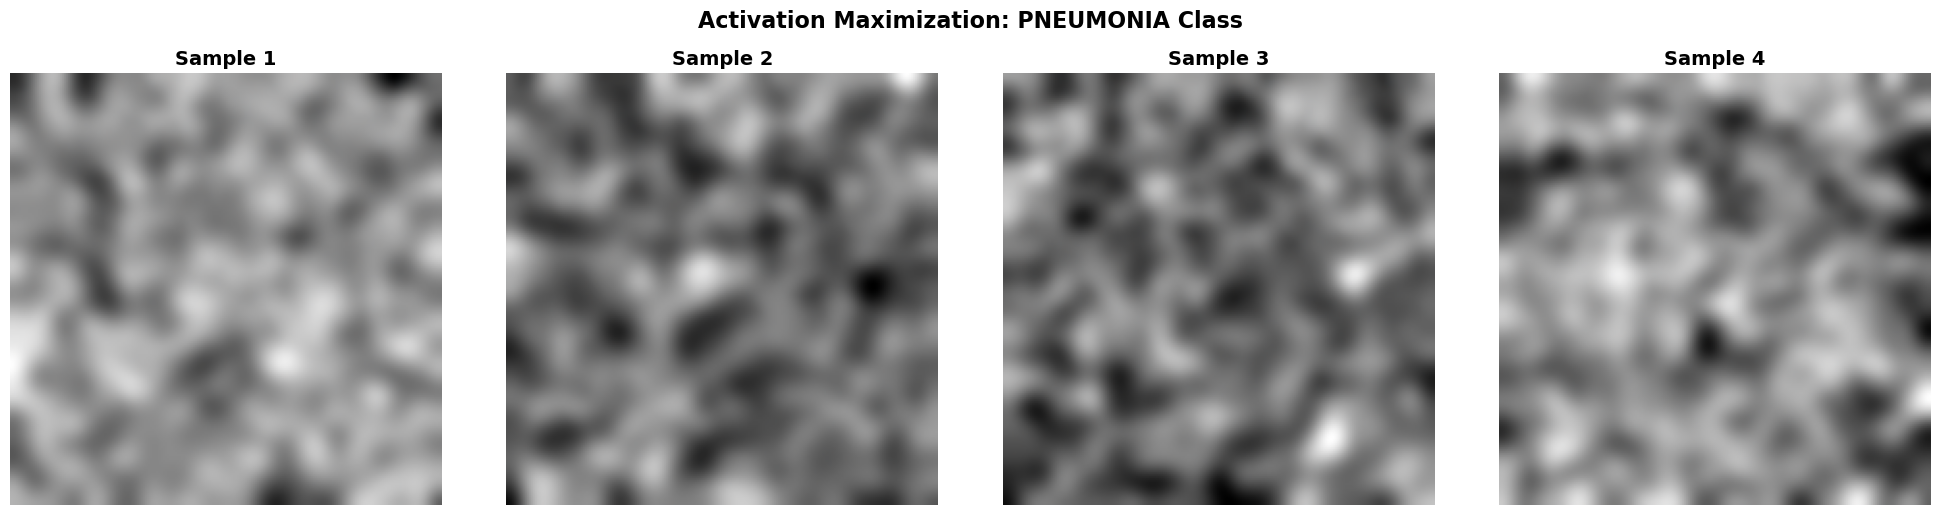

💾 Saved: /home/javier/final_project_xai/reports/figures/18_am_shortcut_pneumonia_curves.png


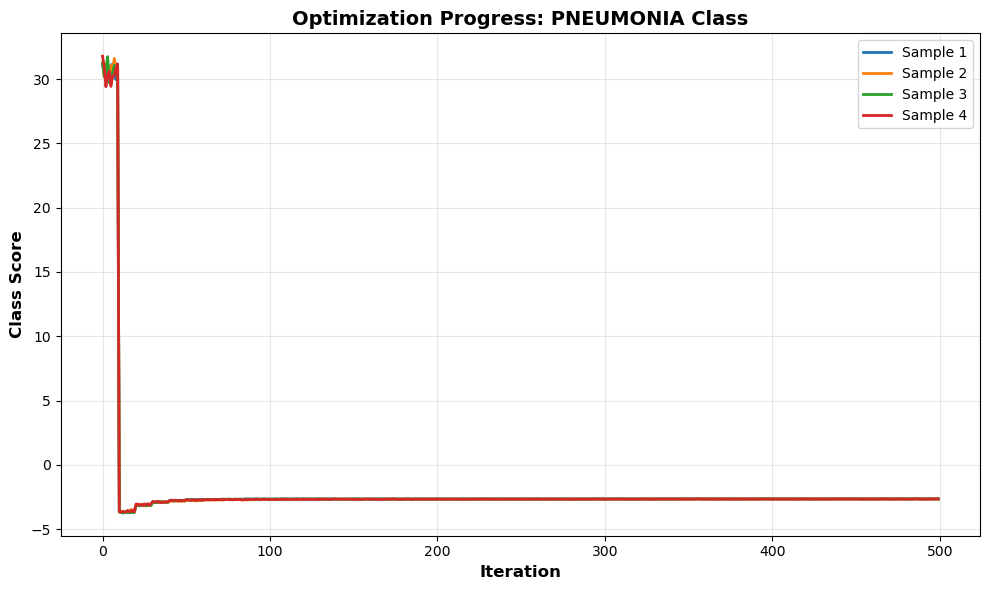

In [8]:
print("\n" + "="*70)
print("SHORTCUT MODEL: PNEUMONIA CLASS PROTOTYPES")
print("="*70)

am_shortcut = ActivationMaximization(shortcut_model, device=device)

shortcut_pneumonia_images, shortcut_pneumonia_scores = am_shortcut.generate_multiple(
    target_class=1,  # PNEUMONIA
    num_samples=4,
    num_iterations=500,
    learning_rate=0.1,
    l2_reg=1e-4,
    blur_frequency=10
)

visualize_activation_maximization(
    shortcut_pneumonia_images,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '18_am_shortcut_pneumonia.png'
)

plot_optimization_curves(
    shortcut_pneumonia_scores,
    target_class=1,
    class_names=class_names,
    save_path=project_root / 'reports' / 'figures' / '18_am_shortcut_pneumonia_curves.png'
)


COMPARISON: BASELINE VS SHORTCUT (PNEUMONIA)
💾 Saved: /home/javier/final_project_xai/reports/figures/18_am_comparison_baseline_vs_shortcut.png


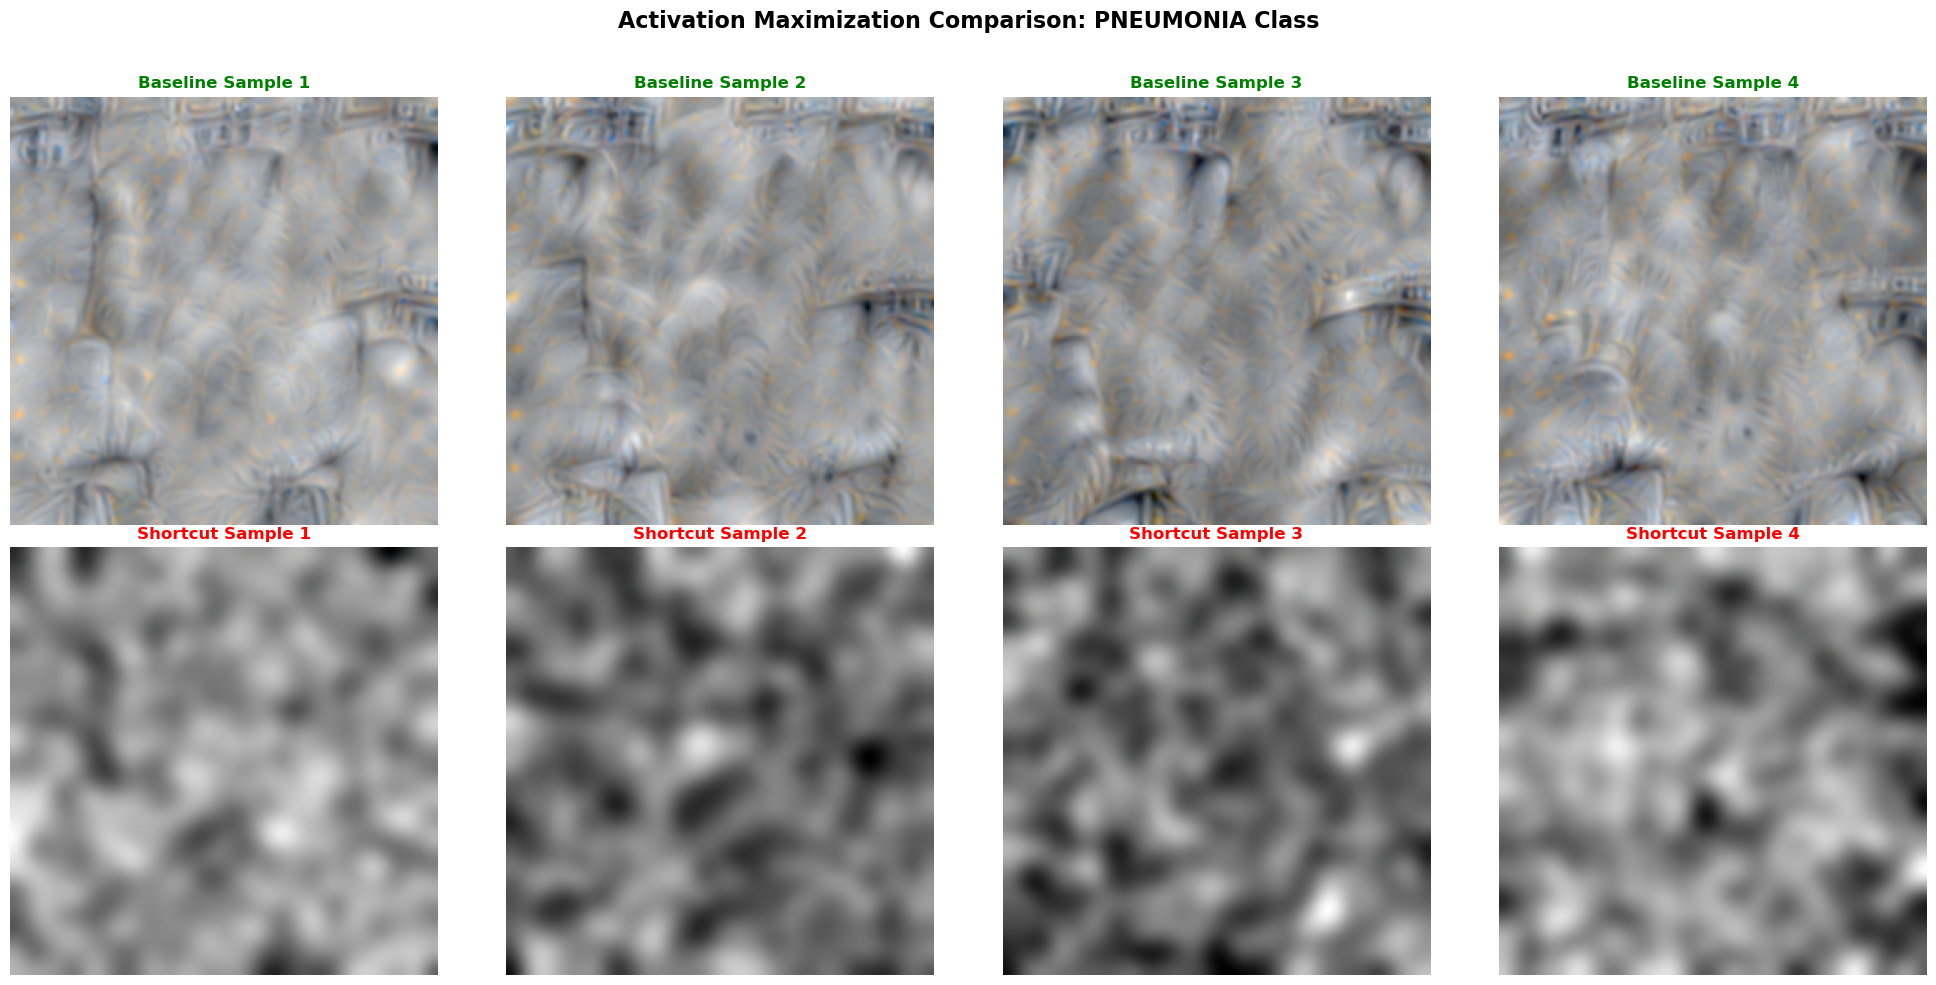

In [ ]:
print("\n" + "="*70)
print("COMPARISON: BASELINE VS SHORTCUT (PNEUMONIA)")
print("="*70)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Row 1: Baseline
for i in range(4):
    from src.explainability.activation_maximization import denormalize_for_visualization
    img_vis = denormalize_for_visualization(baseline_pneumonia_images[i])
    axes[0, i].imshow(img_vis)
    axes[0, i].set_title(f'Baseline Sample {i+1}', fontsize=12, fontweight='bold', color='green')
    axes[0, i].axis('off')

# Row 2: Shortcut
for i in range(4):
    img_vis = denormalize_for_visualization(shortcut_pneumonia_images[i])
    axes[1, i].imshow(img_vis)
    axes[1, i].set_title(f'Shortcut Sample {i+1}', fontsize=12, fontweight='bold', color='red')
    axes[1, i].axis('off')

plt.suptitle(
    'Activation Maximization Comparison: PNEUMONIA Class',
    fontsize=16,
    fontweight='bold',
    y=0.98
)
plt.tight_layout(rect=[0, 0, 1, 0.96])

save_path = project_root / 'reports' / 'figures' / '19_am_comparison_baseline_vs_shortcut.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"💾 Saved: {save_path}")
plt.show()